# Omics Tutorial

## Installation

Please run the cell block below:

In [ ]:
# Install biopython and conda
!pip --quiet install condacolab biopython==1.75

# Install mmseqs2
import condacolab
condacolab.install()
!conda install -c conda-forge -c bioconda mmseqs2 -y -q

# Download the example data
!wget https://raw.githubusercontent.com/scifm/intro-to-tokenizers/main/data/example.fasta

# Download the dugong mmseqs example data from uniprot
!wget -O dugong_data.fasta "https://rest.uniprot.org/uniprotkb/stream?format=fasta&query=%28dugong%29"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 78.3 MB/s eta 0:00:00
✨🍰✨ Everything looks OK!
Channels:
 - conda-forge
 - bioconda
Platform: linux-64
Solving environment: ...working... done

# All requested packages already installed.

--2024-07-10 16:40:06--  https://raw.githubusercontent.com/scifm/intro-to-tokenizers/main/data/example.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 199 [text/plain]
Saving to: ‘example.fasta.1’

example.fasta.1     100%[===================>]     199  --.-KB/s    in 0s      

2024-07-10 16:40:06 (10.2 MB/s) - ‘example.fasta.1’ saved [199/199]

--2024-07-10 16:40:06--  https://rest.uniprot.org/uniprotkb/stream?format=fasta&query=%2

# Omics

The branches of science known informally as omics are various disciplines in biology whose names end in the suffix -omics, such as genomics, proteomics, metabolomics, metagenomics, phenomics and transcriptomics. Omics aims at the collective characterization and quantification of pools of biological molecules that translate into the structure, function, and dynamics of an organism or organisms. [source](https://www.mdpi.com/2673-592X/2/1/9)

![image.png](https://github.com/scifm/summer-school-2024/blob/main/img/omics-overview.png?raw=true)

The suffix -ome as used in molecular biology refers to a totality of some sort.

For more information: https://en.wikipedia.org/wiki/Omics


# There are many types of omics

1. **Genomics**: Study of the genome, the complete set of genes in an organism.

2. **Proteomics**: Study of the proteome, the entire collection of proteins in an organism's cells.

3. **Metabolomics**: Study of metabolism and the function and interactions of metabolic breakdown products, or metabolites.

4. Transcriptomics: Study of the full complement of RNA in an organism's cells.

5. Lipidomics: Study of lipids and pathways involved in lipid signaling.

6. Epigenomics: Study of the chemical modifications to DNA and histone proteins that regulate gene expression without changing the DNA sequence.

### ... there are actually 194 types of omics listed on the [wikipedia](https://en.wikipedia.org/wiki/Omics) page.

This tutorial will primarily focus on **genomics** and **proteomics**.

# Why should you be aware of omics?

### Personalized medicine
[Personalized medicine](https://www.genome.gov/genetics-glossary/Personalized-Medicine) is an emerging practice of medicine that uses an individual's genetic profile to guide decisions made in regard to the prevention, diagnosis, and treatment of disease.

### One Health
['One Health'](https://www.who.int/news-room/questions-and-answers/item/one-health) is an integrated, unifying approach to balance and optimize the health of people, animals and the environment. It is particularly important to prevent, predict, detect, and respond to global health threats such as the COVID-19 pandemic.

### Sustainability
"Omics tools can illuminate the major drivers of biodiversity loss, including invasive species, pollution, urbanization, overexploitation, and climate change." [Source](https://www.sciencedirect.com/science/article/pii/S0958166923000113)


# Machine learning and omics

Recent advancements in sequencing technology have exponentially expanded genetic databases. We need to develop machine learning techniques to harness this data at scale to explore new hypotheses, make new discoveries, and improve the quality of life on Earth.

![image.png](https://github.com/scifm/summer-school-2024/blob/main/img/ena_embl_growth.png?raw=true)

Source: https://www.ebi.ac.uk/ena/browser/about/statistics



# 1. Biology fundamentals

## What is DNA?

**DNA (Deoxyribonucleic Acid)** is the molecule that carries the genetic instructions for life. It is composed of two long strands that coil around each other to form a double helix. Each strand is made up of a sequence of nucleotides, which are the basic units of DNA. There are four types of nucleotides in DNA, distinguished by the nitrogenous bases they contain: adenine (A), thymine (T), cytosine (C), and guanine (G).

![image.png](https://github.com/scifm/summer-school-2024/blob/main/img/dna.jpg?raw=true)

Source: https://www.genome.gov/genetics-glossary/Deoxyribonucleic-Acid

### Key Points:
- **Double Helix Structure**: DNA's double helix is formed by two complementary strands that run in opposite directions.
- **Nucleotide Composition**: Each nucleotide consists of a sugar (deoxyribose), a phosphate group, and a nitrogenous base.
- **Base Pairing**: Adenine pairs with thymine (A-T) and cytosine pairs with guanine (C-G) through hydrogen bonds.
- **Genetic Information**: DNA stores genetic information that determines the development, functioning, growth, and reproduction of all living organisms and many viruses.
- **Protein Synthesis**: DNA sequences (genes) are transcribed into RNA, which then directs the synthesis of proteins.

## What is RNA?

**RNA (Ribonucleic Acid)** is a single-stranded molecule involved in various roles within the cell, mainly related to the synthesis of proteins. RNA is similar to DNA but has some key differences: it contains the sugar ribose instead of deoxyribose, and the base uracil (U) replaces thymine (T).

![image.png](https://github.com/scifm/summer-school-2024/blob/main/img/rna.jpg?raw=true)

Source: https://www.genome.gov/genetics-glossary/RNA-Ribonucleic-Acid

### Key Points:
- **Single-Stranded**: Unlike DNA, RNA is typically single-stranded.
- **Nucleotide Composition**: Each nucleotide in RNA consists of a sugar (ribose), a phosphate group, and a nitrogenous base (adenine (A), uracil (U), cytosine (C), and guanine (G)).
- **Types of RNA**:
  - **mRNA (Messenger RNA)**: Carries the genetic information from DNA to the ribosome, where proteins are synthesized.
  - **tRNA (Transfer RNA)**: Brings the appropriate amino acids to the ribosome during protein synthesis.
  - **rRNA (Ribosomal RNA)**: A component of ribosomes, which are the sites of protein synthesis.
  - And more ...
- **Transcription**: The process of copying a segment of DNA into RNA.
- **Translation**: The process where mRNA is decoded by ribosomes to produce a specific protein.
- **Gene Regulation**: Certain types of RNA (like miRNA and siRNA) are involved in regulating gene expression.

## What is a Protein?

**Proteins** are large, complex molecules that play many critical roles in the body. They are made up of one or more chains of amino acids, which are linked together in a specific order determined by the sequence of nucleotides in the gene encoding the protein. Proteins are essential for the structure, function, and regulation of the body's tissues and organs.

![image.png](https://github.com/scifm/summer-school-2024/blob/main/img/protein.jpg?raw=true)

Source: https://www.genome.gov/genetics-glossary/Protein

### Key Points:
- **Amino Acids**: The building blocks of proteins. There are 20 different amino acids that combine to form proteins.
- **Structure Levels**:
  - **Primary Structure**: The sequence of amino acids in a polypeptide chain.
  - **Secondary Structure**: Local folding into structures like alpha-helices and beta-sheets.
  - **Tertiary Structure**: The overall three-dimensional shape of a single polypeptide chain.
  - **Quaternary Structure**: The structure formed by multiple polypeptide chains (subunits).
- **Functions**: Enzymatic activity, structural support, transport molecules, cell signaling, immune response.

## Putting it all together with ribosomes

![image.png](https://github.com/scifm/summer-school-2024/blob/main/img/ribosome.jpg?raw=true)

Source: https://www.genome.gov/genetics-glossary/Ribosome

Proteins are synthesized through the processes of **transcription** (DNA to RNA) and **translation** (RNA to protein), highlighting the central role of DNA and RNA in protein production.


![image.png](https://github.com/scifm/intro-to-tokenizers/blob/main/img/central_dogma.jpg?raw=true)

Source: https://en.wikipedia.org/wiki/Central_dogma_of_molecular_biology

In general we assume that coding sequences of DNA will propogate to proteins through ribosomes.

## The genetic code

Genetic code refers to the instructions contained in a gene that tell a cell how to make a specific protein. Each gene’s code uses the four nucleotide bases of DNA: adenine (A), cytosine (C), guanine (G) and thymine (T) / uracil (U) — in various ways to spell out three-letter “codons” that specify which amino acid is needed at each position within a protein.

![image.png](https://github.com/scifm/summer-school-2024/blob/main/img/genetic-code.jpg?raw=true)

Source: https://www.genome.gov/genetics-glossary/Genetic-Code

# 2. Genomics file formats

## FASTA File Format

The FASTA file format is a widely used format for representing nucleotide sequences (DNA or RNA) or peptide sequences (proteins).

For more information: https://en.wikipedia.org/wiki/FASTA_format

### Structure of a FASTA File

A FASTA file consists of multiple sequence entries. Each entry has two main components:

1. **Header Line**: Begins with a `>` character, followed by a sequence identifier and an optional description.
2. **Sequence Lines**: One or more lines that contain the actual sequence data (nucleotides or amino acids).

### Example of a FASTA File containing nucleotide sequences

```plaintext
>sequence1 description of sequence 1
ATGCGTACGTAGCTAGCTAGCTA
GCTAGCTAGCTAGCTAGCTAGCT
>sequence2 description of sequence 2
GATTACAAGGTTAGCTAGCTAGT
AGCTAGCTAGCTAGCTAGCTAGC
```

### Tips for dealing with FASTA files
- **Line Length**: While not mandatory, it's common practice to limit sequence lines to a maximum of 80 characters for better readability.
- **File Extension**: FASTA files typically have extensions like .fasta, .fa, .fna (nucleic acid), or .faa (amino acid).
- **Applications**: FASTA files are used in bioinformatics for sequence alignment, database searching, and other computational analyses.

In [ ]:
# Reading a fasta file in python
from Bio import SeqIO

# Replace 'your_fasta_file.fasta' with the path to your FASTA file
fasta_file = "example.fasta"

# Read the FASTA file
sequences = list(SeqIO.parse(fasta_file, "fasta"))

# Print out each sequence
for seq_record in sequences:
    # Get the nucleotide sequence
    nucleotide_seq = seq_record.seq

    # Get the amino acid sequence
    amino_acid_seq = nucleotide_seq.translate()

    # Print the sequence info
    print(f"ID: {seq_record.id}")
    print(f"Description: {seq_record.description}")
    print(f"Nucleotide sequence: {nucleotide_seq}")
    print(f"Amino acid sequence: {amino_acid_seq}\n")

ID: Sequence_1
Description: Sequence_1
Nucleotide sequence: ATGCGACTACGATCGAGGGCCATGTGA
Amino acid sequence: MRLRSRAM*

ID: Sequence_2
Description: Sequence_2
Nucleotide sequence: ATGCGACTACGATCGAGGGCCATGCCCTGA
Amino acid sequence: MRLRSRAMP*

ID: Sequence_3
Description: Sequence_3
Nucleotide sequence: ATGCGTAGCTGGCTAGCATCGATGCTAGCTGATTAA
Amino acid sequence: MRSWLASMLAD*

ID: Sequence_4
Description: Sequence_4
Nucleotide sequence: ATGTTAGCTAGCTCGCTCGATCGATCGCAGCTGATCGATCGTAGCTTGCTATGA
Amino acid sequence: MLASSLDRSQLIDRSLL*



**Note**: The * symbols at the end of the amino acid sequences is Biopythons way of indicating that this is a full protein sequence that is not truncated (it is a place holder for a STOP codon). This token is not required in a the fasta format.

# 3. Toward building genomic foundation models

If we want to train foundation models for genomics, it is important to understand the underlying data distribution and the process by which it was generated (i.e., **[evolution](https://en.wikipedia.org/wiki/Evolution)**).

## Evolutionary conservation

**[Sequence homology](https://en.wikipedia.org/wiki/Sequence_homology)** is the biological homology between DNA, RNA, or protein sequences, defined in terms of shared ancestry in the evolutionary history of life. Two segments of DNA can have shared ancestry because of three phenomena:
1. Speciation events (orthologs)
2. Duplication events (paralogs)
3. Horizontal (or lateral) gene transfer events (xenologs)

Homology among DNA, RNA, or proteins is typically inferred from their nucleotide or amino acid **[sequence similarity](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3820096/)**. Significant similarity is strong evidence that two sequences are related by evolutionary changes from a common ancestral sequence. **[Alignments](https://en.wikipedia.org/wiki/Multiple_sequence_alignment)** of multiple sequences are used to indicate which regions of each sequence are homologous. Computationally, this resembles the [Longest Common Subsequence](https://www.geeksforgeeks.org/longest-common-subsequence-dp-4/) (LCS) problem.

**Conservation indicates that a sequence or important subsequence (i.e., [motif](https://en.wikipedia.org/wiki/Sequence_motif)) has been maintained by natural selection.**

**These patterns, along with the biological functions they encode, are what we hope for a genomic foundation model to learn.**

### Example: discovering a new domain of life through evolutionary conservation

One important class of highly conserved sequences are the [RNA components](https://en.wikipedia.org/wiki/Ribosomal_RNA) of [ribosomes](https://en.wikipedia.org/wiki/Ribosome) present in all domains of life. By comparing these across a diverse set of organisms, Woese and Fox were able to discover a new domain of life, the archaea.

![image.png](https://github.com/scifm/summer-school-2024/blob/main/img/woese-paper.png?raw=true)


![image.png](https://github.com/scifm/summer-school-2024/blob/main/img/tree-of-life.png?raw=true)


**LUCA**: [last universal common ancestor](https://en.wikipedia.org/wiki/Last_universal_common_ancestor)

## Sequence alignment

Sequence alignment computational approach for understanding the similarities between sequences.

We willl focus on [Pairwise sequence alignment](https://en.wikipedia.org/wiki/Sequence_alignment) which uses a [dynamic programming](https://en.wikipedia.org/wiki/Dynamic_programming) algorithm.

There are two primary types of alignment:
- **Local alignment**: finds just the subsequences that align the best.
- **Global alignment**: finds the best agreement between all characters in two sequences.

When aligning sequences, there are two important settings you can specify, the **match score** and **gap penalty**.

### Understanding Match Score and Gap Penalty
#### Match Score
- Match Score: Points given when characters in two sequences match. Higher points indicate higher similarity.
- Exact Match (x): Full points for identical characters (e.g., A vs. A might score +1).

#### Gap Penalty
- Gap Penalty: Points subtracted for inserting gaps in the alignment (these could represent **insertion** or **deletion** mutations)
- Gap **Open Penalty**: Cost of starting a new gap.
- Gap **Extension Penalty**: Cost of extending an existing gap.

### Global alignment

In [ ]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [ ]:
# Align the two sequences with:
# Match score: 1 for identical characters and otherwise 0
# Gap penalty: None
alignments = pairwise2.align.globalxx("ACCGT", "ACG")

# Print the alignments
for alignment in alignments:
    print(format_alignment(*alignment))

ACCGT
| || 
A-CG-
  Score=3

ACCGT
|| | 
AC-G-
  Score=3



In [ ]:
# Align the two sequences with:
# Match score: 2 for identical characters and otherwise -1
# Gap penalty: None
alignments = pairwise2.align.globalmx("ACCGT", "ACG", 2, -1)

# Print the alignments
for alignment in alignments:
    print(format_alignment(*alignment))

ACCGT
| || 
A-CG-
  Score=6

ACCGT
|| | 
AC-G-
  Score=6



In [ ]:
# Align the two sequences with:
# Match score: 2 for identical characters and otherwise -1.
# Gap penalty: 0.5 points are deducted when opening a gap, and 0.1 points are deducted when extending it
alignments = pairwise2.align.globalms("ACCGT", "ACG", 2, -1, -.5, -.1)

# Print the alignments
for alignment in alignments:
    print(format_alignment(*alignment))

ACCGT
| || 
A-CG-
  Score=5

ACCGT
|| | 
AC-G-
  Score=5



### Local alignment

In [ ]:
# Align the two sequences with:
# Match score: 2 for identical characters and otherwise -1
# Gap penalty: None
alignments = pairwise2.align.localmx("ACCCGT", "ATCCCG", 2, -1)

# Print the alignments
for alignment in alignments:
    print(format_alignment(*alignment))

1 A-CCCG
  | ||||
1 ATCCCG
  Score=10



In [ ]:
# Align the two sequences with:
# Match score: 2 for identical characters and otherwise -1
# Gap penalty: None
alignments = pairwise2.align.localmx("AGCCCGT", "ATCCCG", 2, -1)

# Print the alignments
for alignment in alignments:
    print(format_alignment(*alignment))

1 AG-CCCG
  |  ||||
1 A-TCCCG
  Score=10



In [ ]:
# Align the two sequences with:
# Match score: 2 for identical characters and otherwise -1
# Gap penalty: 0.5 points are deducted when opening a gap, and 0.1 points are deducted when extending it
alignments = pairwise2.align.localms("AGCCCGT", "ATCCCG", 2, -1, -.5, -.1)

# Print the alignments
for alignment in alignments:
    print(format_alignment(*alignment))

1 AG-CCCG
  |  ||||
1 A-TCCCG
  Score=9

1 AGCCCG
  |.||||
1 ATCCCG
  Score=9



In [ ]:
# Align the two sequences with:
# Match score: 2 for identical characters and otherwise -1
# Gap penalty: 1 point is deducted when opening a gap, and 0.1 points are deducted when extending it
alignments = pairwise2.align.localms("AGCCCGT", "ATCCCG", 2, -1, -1, -.1)

# Print the alignments
for alignment in alignments:
    print(format_alignment(*alignment))

1 AGCCCG
  |.||||
1 ATCCCG
  Score=9



## Multiple sequence alignment

**[Multiple sequence alignment (MSA)](https://en.wikipedia.org/wiki/Multiple_sequence_alignment)** is the process or the result of sequence alignment of three or more biological sequences, generally protein, DNA, or RNA.

![image.png](https://github.com/scifm/summer-school-2024/blob/main/img/msa.gif?raw=true)

# 4. How to deduplicate gene/protein data for training a foundation model?

At a high level, we would like to train protein/genomic foundation models across diverse sets data.
However, there exists bias in the sequence databases that reflect which sequences humans have spent
time characterizing and sequencing. For instance, there are many more SARS-CoV-2 genomes sequenced
then for other viruses.

**Q: How can we ensure that our model training is not biased towards particular regions of sequence space?**

**A:** By first clustering the sequences based on their similarity (i.e., alignments), and then sampling
training examples from each cluster.

There are many ways of doing this. In this tutorial, we demonstrate the use of [MMseqs2](https://github.com/soedinglab/MMseqs2).

<!-- ![image.png](attachment:a5e130dd-67af-4e8a-8d3c-827cdbc9e38a.png) -->

Note: Everything that is done for mmseqs2 clustering is an approximation or equal to pairwise alignment. Any massive scale approach needs some heuristics.

In [ ]:
from __future__ import annotations

import re
import subprocess
import tempfile
from pathlib import Path
from dataclasses import dataclass
import pandas as pd

@dataclass
class Sequence:
    """Store a biological sequence and its description tag."""

    sequence: str
    """Biological sequence (Nucleotide sequence)."""
    tag: str
    """Sequence description tag."""

def read_fasta(fasta_file: str) -> list[Sequence]:
    """Read fasta file sequences and description tags into dataclass."""
    text = Path(fasta_file).read_text()
    pattern = re.compile('^>', re.MULTILINE)
    non_parsed_seqs = re.split(pattern, text)[1:]
    lines = [
        line.replace('\n', '')
        for seq in non_parsed_seqs
        for line in seq.split('\n', 1)
    ]

    return [
        Sequence(sequence=seq, tag=tag)
        for seq, tag in zip(lines[1::2], lines[::2])
    ]

def write_fasta(
    sequences: Sequence | list[Sequence],
    fasta_file: Path,
    mode: str = 'w',
) -> None:
    """Write or append sequences to a fasta file."""
    seqs = [sequences] if isinstance(sequences, Sequence) else sequences
    with open(fasta_file, mode) as f:
        f.write('\n'.join(f'>{seq.tag}\n{seq.sequence}' for seq in seqs))

def mmseqs2_cluster(
    sequences: list[Sequence],
    min_seq_id: float = 0.5,
    cluster_coverage: float = 0.8,
    cov_mode: int = 1,
    verbose: bool = False,
) -> pd.DataFrame:
    """Cluster sequences using MMSeqs2.

    Parameters
    ----------
    sequences : list[Sequence]
        List of sequences to cluster.
    min_seq_id : float, optional
        Minimum sequence identity, by default 0.5
    cluster_coverage : float, optional
        Minimum cluster coverage, by default 0.8
    cov_mode : int, optional
        Coverage mode, by default 1
    verbose : bool, optional
        Whether to print the mmseqs2 output, by default False

    Returns
    -------
    pd.DataFrame
        Dataframe containing the clusters.
    """
    with tempfile.TemporaryDirectory() as tmp:
        # Write sequences to a temporary file
        input_file = Path(tmp) / 'input.fasta'
        write_fasta(sequences, input_file)

        # MMSeqs2 command
        command = (
            f'mmseqs easy-cluster {input_file} clusterRes tmp '
            f'--min-seq-id {min_seq_id} '
            f'-c {cluster_coverage} '
            f'--cov-mode {cov_mode}'
        ).split()

        # Run MMSeqs2
        if verbose:
            subprocess.run(command, check=True, cwd=tmp)
        else:
            with open(Path(tmp) / 'mmseqs2.log', 'w') as f:
                subprocess.run(
                    command, check=True, stdout=f, stderr=f, cwd=tmp
                )

        # Load the clustering result
        cluster_file = Path(tmp) / 'clusterRes_cluster.tsv'
        clusters = pd.read_csv(
            cluster_file,
            sep='\t',
            header=None,
            names=['ClusterID', 'SequenceID'],
        )

        # Group sequences by clusters
        groups = clusters.groupby('ClusterID')['SequenceID'].apply(list)

    return groups

Lets analyze protein sequence data from the [dugong](https://en.wikipedia.org/wiki/Dugong) to see how we might remove some redundancy via clustering.

The dugong is a marine mammal on the vurnerable species list. It is one of four living species of the order Sirenia, which also includes three species of manatees. It is the only living representative of the once-diverse family Dugongidae; its closest modern relative, Steller's sea cow (Hydrodamalis gigas), was hunted to extinction in the 18th century.

Dugongs like coastal habitats that support seagrass meadows.

![Image](https://github.com/scifm/summer-school-2024/blob/main/img/dugong-image.jpg?raw=true)

Source: https://www.barrierreef.org/the-reef/animals/dugong-facts

In [ ]:
# Read the dugong protein sequences
sequences = read_fasta("dugong_data.fasta")

# Run mmseqs2 clustering
clusters = mmseqs2_cluster(sequences, cov_mode=1, min_seq_id=0.5, cluster_coverage=0.8)

print(clusters)

ClusterID
A0A0H4APU1    [A0A0H4APU1, A0A0H4ARC6, A0A0H4AV94, G3M6K5]
A0A0H4APV9            [A0A0H4APV9, A0A0H4AYE9, A0A0H4ARE7]
A0A0H4APW9    [A0A0H4APW9, A0A0H4ARF3, A0A0H4AYF3, G5CY25]
A0A0H4ARD1                [A0A0H4ARD1, A0A0H4AWC3, G5CXB3]
A0A0H4ARE3            [A0A0H4ARE3, A0A0H4AWD0, A0A0H4AYE6]
                                  ...                     
Q8W9N5                        [Q8W9N5, A0A3G2ZNA7, Q8SK61]
Q8W9N6                                [Q8W9N6, A0A3G2ZMN7]
Q9GJZ3                                            [Q9GJZ3]
Q9UAR4                                            [Q9UAR4]
R9RZK1            [R9RZK1, R9RY66, R9S070, R9S071, R9RZZ0]
Name: SequenceID, Length: 61, dtype: object


In [ ]:
# See how many clusters there are
print(f"Number of clusters {len(clusters)} out of {len(sequences)} sequences")

Number of clusters 61 out of 190 sequences


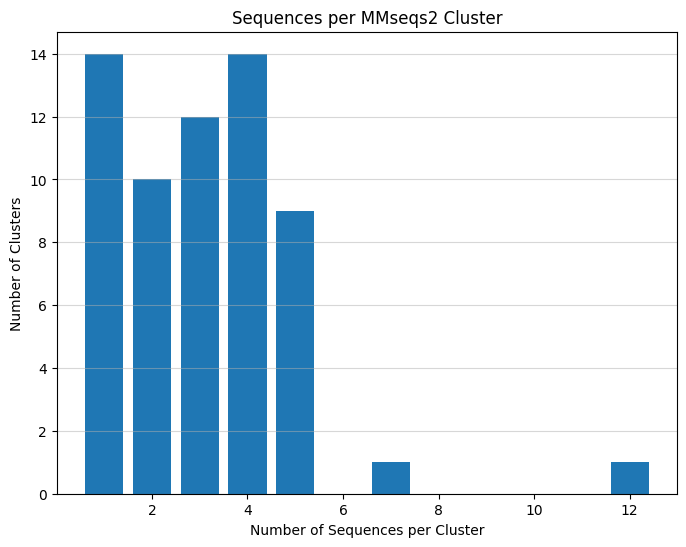

In [ ]:
import matplotlib.pyplot as plt

# Compute the number of proteins per cluster
cluster_counts = [len(cluster) for cluster in clusters]

# Plotting the histogram of the cluster counts
plt.figure(figsize=(8, 6))
plt.hist(cluster_counts, bins=range(min(cluster_counts), max(cluster_counts) + 2), align='left', rwidth=0.8)
plt.xlabel('Number of Sequences per Cluster')
plt.ylabel('Number of Clusters')
plt.title('Sequences per MMseqs2 Cluster')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [ ]:
# Get the largest cluster
largest_cluster = max(clusters, key=lambda x: len(x))

print("Size of largest cluster: ", len(largest_cluster))
print("Cluster membership:")
print(largest_cluster)

Size of largest cluster:  12
Cluster membership:
['Q45XH5', 'A0A481WND8', 'A0A481WND9', 'A0A481WNH0', 'A0A481WPK4', 'A0A481WQ07', 'A0A481WQ84', 'A0A481WQZ5', 'Q45XI7', 'A0A481WPM8', 'A0A481WQB0', 'A0A481WR13']


In [ ]:
# Print the sequences to see what the cluster contains
for sequence in sequences:
  if any(seq_id in sequence.tag for seq_id in largest_cluster):
      print(sequence)

Sequence(sequence='MVYFTAEEKAAITSLWGKVNVEEAGGKALGRLLIVYPWTQRFFDKFGNLSSASAIMGNPKIKAHGKKVLNSFGDAVENPDNLKGTFAKLSELHCDKLLVDPEDFRLLGNVIVIVLANHFGKEFTPQVQAAWQKMVTGVASALARKYH', tag='sp|Q45XH5|HBG_DUGDU Hemoglobin subunit gamma OS=Dugong dugon OX=29137 GN=HBG PE=2 SV=3')
Sequence(sequence='MVHLTADETALVTGLWAKVNVKEYGGEALGRLLVVYPWTQRFFEHFGDLSSASAVMHNPKVKAHGEKVLASFGDGLKHLDDLKGAFAELSALHCEKSHVDPQNFKLLGNMLVCVLSRHLGKEFSPQAQAAYEKVVAGVANALAHKYH', tag='sp|Q45XI7|HBD_DUGDU Hemoglobin subunit delta OS=Dugong dugon OX=29137 GN=HBD PE=2 SV=3')
Sequence(sequence='XAEXKSAVTSLWGKVNVEEAGGEALGRLLVVYPWTQRFFDTFGNLXSASAIMGXXXXXXXXXXXXXXXXXXXKNMDNLKNAFAKLSELHCDKLHVDPENFRLLGNVLVIILASHFGKKXXXXXXAAWQKLVSGVANALSHKYH', tag='tr|A0A481WND8|A0A481WND8_HYDGI Hemoglobin subunit epsilon (Fragment) OS=Hydrodamalis gigas OX=63631 GN=HBE PE=3 SV=1')
Sequence(sequence='MVHFTAEEKSAVTSLWGKVNVEEAGGEALGRLLVVYPWTQRFFDTFGNLSSASAIMGNPKVKAHGKKVLTSFGDAVKNMDNLKNAFAKLSELHCDKLHVDPENFRLLGNVLVIILASHFGKEFTPDTQAAWQKLVSGVANALSHKYH', tag='tr|A0A481WN

**Note**: [Hemoglobin](https://en.wikipedia.org/wiki/Hemoglobin) is a protein containing iron that facilitates the transport of oxygen in red blood cells.

In [ ]:
# Get the second largest cluster
largest_cluster = sorted(clusters, key=lambda x: len(x))[-2]

print("Size of the second largest cluster: ", len(largest_cluster))
print("Cluster membership:")
print(largest_cluster)

Size of the second largest cluster:  7
Cluster membership:
['Q33401', 'A0A3G2ZP02', 'A0FLH2', 'O09233', 'Q85PI5', 'A0A8E6L4L9', 'A0A8E6NSG8']


In [ ]:
# Print the sequences to see what the cluster contains
for sequence in sequences:
  if any(seq_id in sequence.tag for seq_id in largest_cluster):
      print(sequence)

Sequence(sequence='MTNIRKSHPLIKILNNSFIDLPTPVNISSWWNFGSLLGACLIIQILTGLFLAMHYTSDTLTAFSSVTHICRDVNYGWIIRYLHANGASMFFLCLYAHIGRGIYYGSYLYPETWNIGIVLLLTVMATAFMGYVLPWGQMSFWGATVITNLLSAIPYIGTNLVEWVWGGFSVDKATLTRFFALHFILPFIVTALVMVHLLFLHETGSNNPTGLISDSDKIPFHPYYSVKDLLGLFLLILVLLLLTLFSPDMLGDPDNYTPANPLNTPPHIKPEWYFLFRYAILRSIPNKLGGVLALVLSILILALLPLLHTSKQRSLSFRPLSQCLFWILVADLITLTWIGGQPVEHPYIIIGQLASILYFSIILIFMPIAGLIENHLLKW', tag='sp|Q33401|CYB_DUGDU Cytochrome b OS=Dugong dugon OX=29137 GN=MT-CYB PE=3 SV=1')
Sequence(sequence='MTNIRKTHPLIKILNDSFIDLPTPTNISSWWNFGSLLGACLIIQILTGLFLAMHYTSDTSTAFSSVAHICRDVNYGWIIRYLHANGASMFFLCLYAHIGRGIYYGSYLYPETWNIGIVLLLTVMATAFMGYVLPWGQMSFWGATVITNLLSAIPYIGTNLVEWVWGGFSVDKATLTRFFALHFILPFIVTALVAVHLLFLHETGSNNPTGLVSNSDKIPFHPYYSTKDLLGLFLLILVLLLLTLFSPDMLGDPDNYTPANPLSTPPHIKPEWYFLFAYAILRSIPNKLGGVLALILSILILALLPLLHTSKQRSLSFRPLSQCLFWILVADLITLTWIGGQPVEHPYIIIGQLASILYFAIILILMPAAGLIENHLLKW', tag='tr|A0A3G2ZP02|A0A3G2ZP02_HYDGI Cytochrome b OS=Hydrodamalis gigas OX=63631 GN=CYTB PE=3 SV=1')
Sequence(sequ

**Note**: [Cytochrome b](https://en.wikipedia.org/wiki/Cytochrome_b) is a protein found in the membranes of aerobic cells--in eukaryotic mitochondria (inner membrane).

## ✏️ Exercise
 The Great Barrier Reef Foundation says that [dugongs are more closely related to elephants than to whales and dolphins](https://www.barrierreef.org/the-reef/animals/dugong-facts). Using what you learned in this tutorial, can you prove it?

# Conclusion

In this tutorial we introduced 'Omics' data and went over several common techniques in bioinformatics for understanding the relationship between species. These techniques are important for developing and evaluating biological foundation models, necessary for gaining insight from the massive Omics datasets currently being collected.

For more bioinformatics tutorials: https://rosalind.info/problems/list-view/

# Citations

Many graphics courtesy of the National Human Genome Research Institute: https://www.genome.gov/